# import data

In [1]:
from glob import glob
import os
import sys
from tqdm import tqdm

In [111]:
# 读取数据
data_path = r'E:\MIEdata'
fileNames = glob(data_path+'\\p=-1*.txt')

M,ALPHA=[],[]
sr = 1800 + 1
i1 = np.zeros((len(fileNames), sr))
i2 = np.zeros((len(fileNames), sr))
for idx, i in enumerate(fileNames):
    baseName = os.path.basename(i) # 'p=-1,m=0.95,a=973.88.txt'
    _,m,alpha = baseName.split(',')
    alpha = '.'.join(alpha.split('.')[:-1])
    m = m.split('=')[-1]
    alpha=alpha.split('=')[-1]
    M.append(m)
    ALPHA.append(alpha)
    i1[idx] = pd.read_table(i, encoding='gb2312',sep='\t',index_col=None).I1.to_numpy().astype(np.float32)
    i2[idx] = pd.read_table(i, encoding='gb2312',sep='\t',index_col=None).I2.to_numpy().astype(np.float32)

['E:\\MIEdata\\p=-1,m=0.05,a=10.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=100.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=101.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=102.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=103.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=104.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=105.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=106.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=107.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=108.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=109.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=11.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=110.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=111.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=112.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=113.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=114.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=115.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=116.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=117.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=118.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=119.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=12.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=120.00.t

In [2]:
data_path = r'D:\mydata\all_m_alpha'
fileNames = glob(os.path.join(data_path,'*0.txt'))
_idx = np.arange(len(fileNames))
np.random.shuffle(fileNames)
fileNames[:10]
# fileNames=fileNames[:1000]
# fileNames[:10]

['D:\\mydata\\all_m_alpha\\m=0.614000,a=1.250000.txt',
 'D:\\mydata\\all_m_alpha\\m=0.428000,a=73.000000.txt',
 'D:\\mydata\\all_m_alpha\\m=0.312000,a=68.000000.txt',
 'D:\\mydata\\all_m_alpha\\m=0.578000,a=240.500000.txt',
 'D:\\mydata\\all_m_alpha\\m=0.388000,a=26.500000.txt',
 'D:\\mydata\\all_m_alpha\\m=0.542000,a=193.500000.txt',
 'D:\\mydata\\all_m_alpha\\m=0.406000,a=188.000000.txt',
 'D:\\mydata\\all_m_alpha\\m=0.954000,a=182.250000.txt',
 'D:\\mydata\\all_m_alpha\\m=0.482000,a=4.500000.txt',
 'D:\\mydata\\all_m_alpha\\m=0.570000,a=110.250000.txt']

In [4]:
# dump
def dump(sr=None, size=10000):
    
    
    if sr is None: # 从配置文件中获取 sr
        with open(data_path+'\\输入参数文本.txt') as _f:
            _paras = _f.readlines()
            sr = int(_paras[2].split('\t')[0]) + 1
            print('sr=',sr)

    # --------------------------------------------------------------通用begin
    with open(fileNames[0]) as _f:
        simple_size = sys.getsizeof(_f.read())/1024/1024 # Mb

    size = size # 2048:2GB
    num = int(size/simple_size)+1 # 每一次存的大小是 num个读取的文件
    N = int(len(fileNames)//num)  # 存N次大小为num个的文件
    last_num = len(fileNames)%num # 最后一次存的文件是 last_num个读取的文件
    begin=0
    print('size,simple_size,num,N,last_num\n',size,simple_size,num,N,last_num)
    for c_i in tqdm(range(N+1)):
        if c_i==N:
            num = last_num
        last = begin+num
        filename = fileNames[begin:last]
    # --------------------------------------------------------------通用end
        i1 = np.zeros((len(filename), sr))
        i2 = np.zeros((len(filename), sr))
        dop = np.zeros((len(filename), sr))
        M,ALPHA = [], []
        for idx, i in enumerate(filename):
            baseName = os.path.basename(i) 
            m,alpha = baseName.split(',')
            alpha = '.'.join(alpha.split('.')[:-1])
            m = m.split('=')[-1]
            alpha=alpha.split('=')[-1]
            M.append(m)
            ALPHA.append(alpha)

            i1[idx] = pd.read_table(i, encoding='gb2312',sep='\t',index_col=None).I1.to_numpy().astype(np.float32)
            i2[idx] = pd.read_table(i, encoding='gb2312',sep='\t',index_col=None).I2.to_numpy().astype(np.float32)
            dop[idx] = pd.read_table(i, encoding='gb2312',sep='\t',index_col=None).DOP.to_numpy().astype(np.float32)
            
        M, ALPHA = np.array(M).astype('float32'), np.array(ALPHA).astype('float32')
    # --------------------------------------------------------------- 通用begin
        out_path = r'D:\mydata\out_shuffle'
        np.save(os.path.join(out_path, f'i1_{c_i}.npy'),i1)
        np.save(os.path.join(out_path, f'i2_{c_i}.npy'),i2)
        np.save(os.path.join(out_path, f'dop_{c_i}.npy'),dop)
        np.savez(os.path.join(out_path, f'M_ALPHA_{c_i}.npz'),M=M,ALPHA=ALPHA)
        begin = last
    # --------------------------------------------------------------- 通用end
    return out_path, sr


In [ ]:
target_path, sr = dump()

sr= 2048
size,simple_size,num,N,last_num
 10000 0.1297311782836914 77083 4 27668


 60%|██████████████████████████████████████████████▊                               | 3/5 [2:04:33<1:23:31, 2505.87s/it]

In [2]:
target_path=r'D:\mydata\out_shuffle'
sr = 2048

In [34]:
# load
def load_data(path):
    fileNames = glob(os.path.join(path,'*'))
    
    name_i1 = [i for i in fileNames if 'i1' in i]
    name_i2 = [i for i in fileNames if 'i2' in i]
    name_dop = [i for i in fileNames if 'dop' in i]
    name_m_alpha = [i for i in fileNames if 'M_ALPHA' in i]
    print(name_i1,'\n',name_i2,'\n',name_m_alpha)
    L = len(name_dop) # 3种文件数目相同
    c = 0
    while True:
        i1 = np.load(name_i1[c%L])
        i2 = np.load(name_i2[c%L])
        dop = np.load(name_dop[c%L])
        res = np.load(name_m_alpha[c%L])
        M, ALPHA = res['M'], res['ALPHA']
        print(i1.shape, i2.shape, M.shape)
        c += 1
        yield i1, i2, dop, M, ALPHA
        

data = load_data(target_path)
i1, i2, dop, M, ALPHA = next(data)

['D:\\mydata\\out_shuffle\\i1_0.npy', 'D:\\mydata\\out_shuffle\\i1_1.npy', 'D:\\mydata\\out_shuffle\\i1_2.npy', 'D:\\mydata\\out_shuffle\\i1_3.npy', 'D:\\mydata\\out_shuffle\\i1_4.npy', 'D:\\mydata\\out_shuffle\\i1_5.npy', 'D:\\mydata\\out_shuffle\\i1_6.npy', 'D:\\mydata\\out_shuffle\\i1_7.npy', 'D:\\mydata\\out_shuffle\\i1_8.npy'] 
 ['D:\\mydata\\out_shuffle\\i2_0.npy', 'D:\\mydata\\out_shuffle\\i2_1.npy', 'D:\\mydata\\out_shuffle\\i2_2.npy', 'D:\\mydata\\out_shuffle\\i2_3.npy', 'D:\\mydata\\out_shuffle\\i2_4.npy', 'D:\\mydata\\out_shuffle\\i2_5.npy', 'D:\\mydata\\out_shuffle\\i2_6.npy', 'D:\\mydata\\out_shuffle\\i2_7.npy', 'D:\\mydata\\out_shuffle\\i2_8.npy'] 
 ['D:\\mydata\\out_shuffle\\M_ALPHA_0.npz', 'D:\\mydata\\out_shuffle\\M_ALPHA_1.npz', 'D:\\mydata\\out_shuffle\\M_ALPHA_2.npz', 'D:\\mydata\\out_shuffle\\M_ALPHA_3.npz', 'D:\\mydata\\out_shuffle\\M_ALPHA_4.npz', 'D:\\mydata\\out_shuffle\\M_ALPHA_5.npz', 'D:\\mydata\\out_shuffle\\M_ALPHA_6.npz', 'D:\\mydata\\out_shuffle\\M_ALPHA

In [47]:
# M,ALPHA=[],[]
# sr = 2048
# i1 = np.zeros((len(fileNames), sr))
# i2 = np.zeros((len(fileNames), sr))
# dop = np.zeros((len(fileNames), sr))
# for idx, i in enumerate(fileNames):
#     baseName = os.path.basename(i) # 'm=0.95,a=973.88.txt'
#     m,alpha = baseName.split(',')
#     alpha = '.'.join(alpha.split('.')[:-1])
#     m = m.split('=')[-1]
#     alpha=alpha.split('=')[-1]
#     M.append(m)
#     ALPHA.append(alpha)
    
#     i1[idx] = pd.read_table(i, encoding='gb2312',sep='\t',index_col=None).I1.to_numpy().astype(np.float32)
#     i2[idx] = pd.read_table(i, encoding='gb2312',sep='\t',index_col=None).I2.to_numpy().astype(np.float32)
#     dop[idx] = pd.read_table(i, encoding='gb2312',sep='\t',index_col=None).DOP.to_numpy().astype(np.float32)

In [36]:
i1, i2, dop, M, ALPHA = next(data)
i1.shape, i2.shape, dop.shape, M.shape, ALPHA.shape

(38335, 2048) (38335, 2048) (115005,)


((38335, 2048), (38335, 2048), (38335, 2048), (115005,), (115005,))

('0.832000', '140.000000')

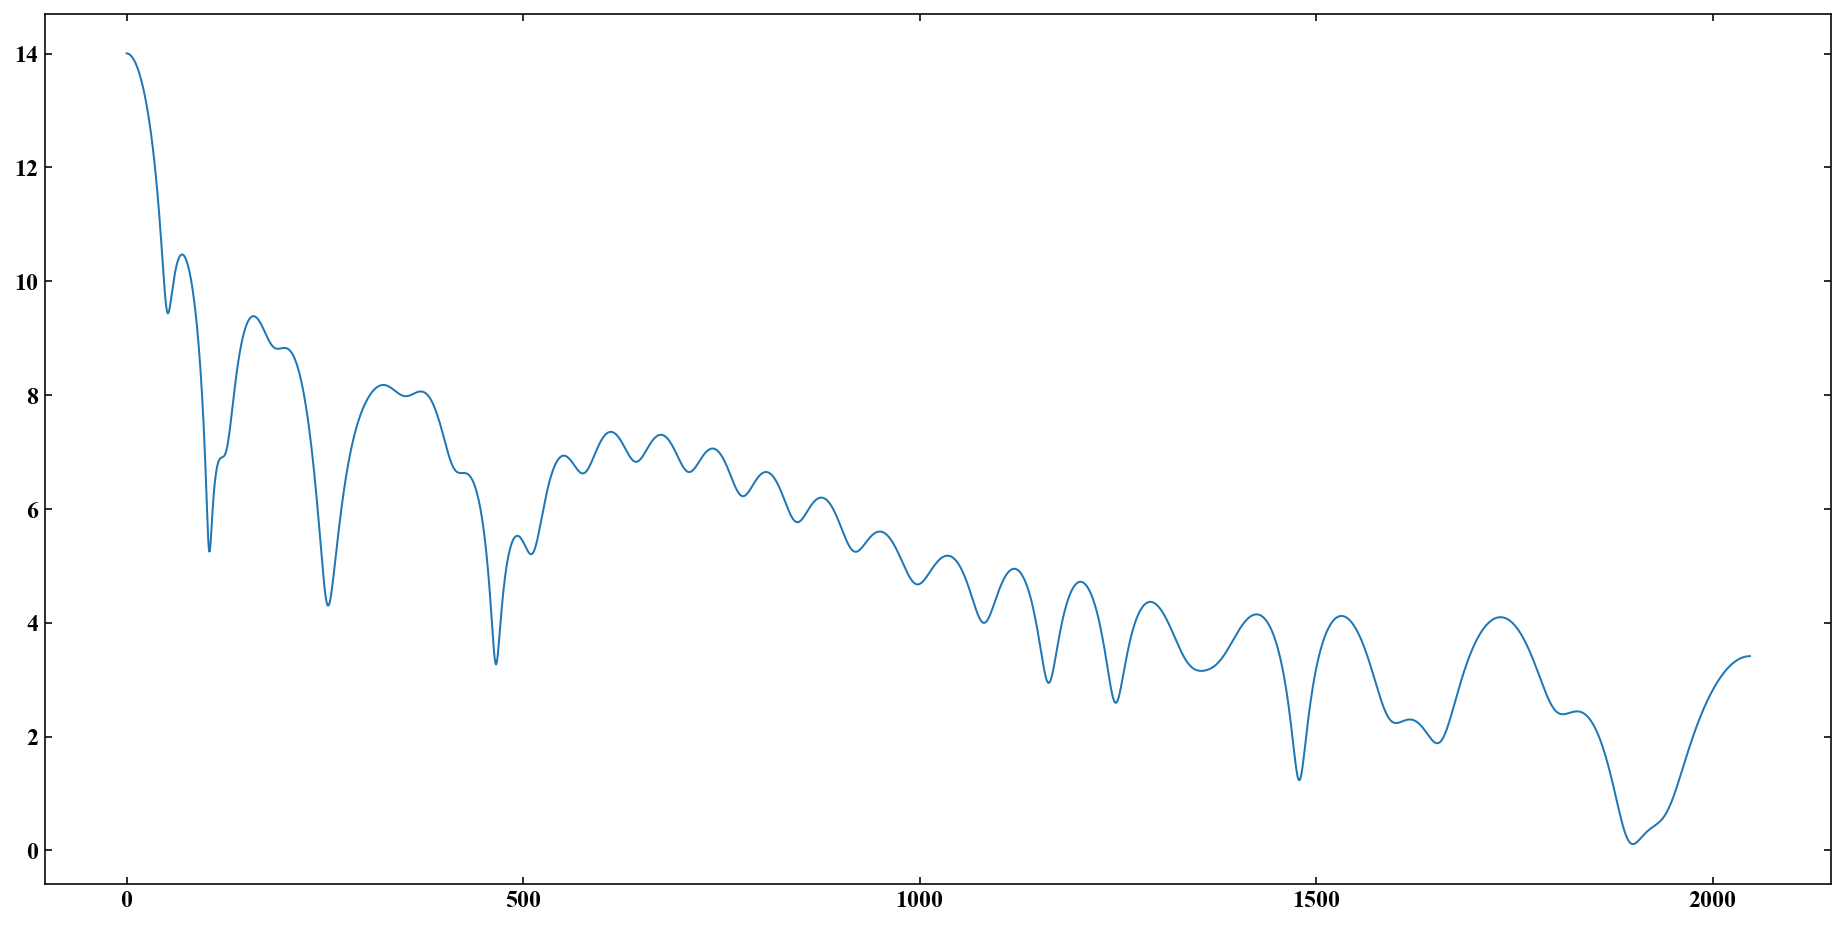

In [28]:
IDX = 20000
plt.figure(figsize=(16,8))
plt.plot(np.log(i1[IDX]))
M[IDX], ALPHA[IDX]

In [35]:
L = len(fileNames)
S = np.arange(L)
np.random.shuffle(S)
S

array([3644, 1685, 3467, ..., 3133, 1852, 2262])

In [6]:
def generateData(batch,theta1, theta2,i1, i2, dop,M, ALPHA, sr, L=i1.shape[0]):
    S = np.arange(L-1)

    d_the = (sr-1)/180
    th1, th2 = int(theta1*d_the), int(theta2*d_the)
    SR = th2-th1
    while True:
        np.random.shuffle(S)
        series = S[:batch]
        yield SR,\
        i1[series, th1:th2].astype(np.float32)[...,None], \
        i2[series, th1:th2].astype(np.float32)[...,None], \
        dop[series, th1:th2].astype(np.float32)[...,None], \
        np.array(M)[series].astype(np.float32)[...,None], \
        np.array(ALPHA)[series].astype(np.float32)[...,None]
        
theta1, theta2 = 15, 36

data = generateData(15, theta1,theta2,i1,i2,dop,M,ALPHA,sr)
SR = next(data)[0]

In [7]:
print(next(data)[0])
print(next(data)[1].shape) # i1
print(next(data)[2].shape) # i2
print(next(data)[3].shape) # dop
print(next(data)[4].shape) # M
print(next(data)[5].shape) # ALPHA

239
(15, 239, 1)
(15, 239, 1)
(15, 239, 1)
(15, 1)
(15, 1)


In [8]:
NEXT = next(data)

(array([0.838], dtype=float32), array([56.75], dtype=float32))

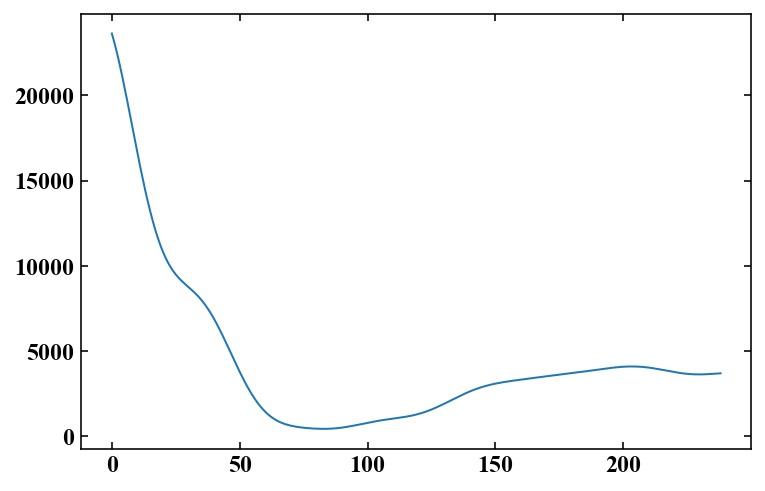

In [9]:

IDX = 11
plt.plot(NEXT[2][IDX])
NEXT[-2][IDX], NEXT[-1][IDX]

In [10]:
# 指定CPU跑
import os 
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow as tf
import numpy as np
# tf.test.is_gpu_available()
from tensorflow.keras import Input,Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Concatenate, Conv2D,Conv1D,Convolution1D,\
Flatten, BatchNormalization,Input,Dropout
from tensorflow.keras.layers import LeakyReLU, ReLU, LayerNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adadelta, Adam, SGD
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy, MAE, KLD, MSLE, MSE

In [11]:
# Model 1
def model1():
    input_x = Input(shape=(SR, 1))
    # x = LayerNormalization()(input_x)
    x = input_x

    x = Conv1D(2, 4, strides=2,padding='same')(x)
    # x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv1D(4, 3, strides=2,padding='same')(x)

    x = ReLU()(x)
    x = Conv1D(8, 3, strides=2,padding='same')(x)

    x = ReLU()(x)
    x = Conv1D(16, 3, strides=2,padding='same')(x)

    x = ReLU()(x)
    x = Conv1D(32, 3, strides=2,padding='same')(x)

    x = ReLU()(x)
    x = Flatten()(x)

    x = Dense(100,'relu')(x)
    rm = Dense(1,'sigmoid')(x)
    alpha = Dense(1,'relu')(x)
    dop = Dense(1, 'tanh')(x)
    model_m = Model(input_x, rm)
    model_alpha = Model(input_x, alpha)
    model_dop = Model(input_x, dop)
    return model_m, model_alpha, model_dop

In [56]:
# Model 2
def model2():
    input_x = Input(shape=(SR, 1))
    # x = LayerNormalization()(input_x)
    x = input_x
    x = Flatten()(x)
    
    x = Dense(SR*10,'relu')(x)
    x = Dense(SR*5,'relu')(x)
    x = Dense(SR,'relu')(x)
#     x = Dense(SR//2,'relu')(x)
    rm = Dense(1,'sigmoid')(x)
    alpha = Dense(1, 'relu')(x)
    dop = Dense(1, 'sigmoid')(x)
    
    model_m = Model(input_x, rm)
    model_alpha = Model(input_x, alpha)
    model_dop = Model(input_x, dop)
    return model_m, model_alpha, model_dop

In [12]:
model_rm, model_alpha, model_dop = model1()

model = model_dop
# model = model_rm
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 239, 1)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 120, 2)            10        
_________________________________________________________________
re_lu (ReLU)                 (None, 120, 2)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 60, 4)             28        
_________________________________________________________________
re_lu_1 (ReLU)               (None, 60, 4)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 30, 8)             104       
_________________________________________________________________
re_lu_2 (ReLU)               (None, 30, 8)             0   

In [13]:
model.compile(loss= MSE,
              optimizer=Adam(learning_rate=2e-4, beta_1=0.5)
#               optimizer=SGD()
             )

In [14]:
batch = 1500
theta1, theta2 = 15, 36
DATA = load_data(target_path)
Big_loop = 0
while Big_loop < 500:
    if Big_loop % 2 == 0:
        i1,i2,dop,M,ALPHA = next(DATA)
    Big_loop += 1
    data = generateData(batch,theta1,theta2,i1,i2,dop,M,ALPHA,sr)
    
    # 使用集成度较低的 Model.train_on_batch方法，自行设定batch数据　和　epochs
    for step in range(300):
        train_data = next(data)
    #     cost = model.train_on_batch(train_data[1], train_data[-2]) # i1
    #     cost = model.train_on_batch(train_data[2], train_data[-2]) # i2
        cost = model.train_on_batch(train_data[3], train_data[-2]) # dop

        if step%100==0:
            print(f'loss: {cost}')

loss: 0.39865249395370483
loss: 0.052703067660331726
loss: 0.028849272057414055
loss: 0.02317599207162857
loss: 0.021408269181847572
loss: 0.018211055546998978
loss: 0.05662358179688454
loss: 0.03590071573853493
loss: 0.03781028836965561
loss: 0.038926683366298676
loss: 0.038673385977745056
loss: 0.0374702624976635
loss: 0.0383097268640995
loss: 0.03832694888114929
loss: 0.039190132170915604
loss: 0.03646981343626976
loss: 0.0375346876680851
loss: 0.03927804157137871
loss: 0.039014119654893875
loss: 0.03814763203263283
loss: 0.03664103522896767
loss: 0.03931349143385887
loss: 0.037739019840955734
loss: 0.03586345165967941
loss: 0.037401869893074036
loss: 0.03651581332087517
loss: 0.03713316470384598
loss: 0.0363570898771286
loss: 0.036421600729227066
loss: 0.03790884092450142
loss: 0.03806048259139061
loss: 0.03697248920798302
loss: 0.03875003010034561
loss: 0.03780730068683624
loss: 0.03782090172171593
loss: 0.036956336349248886
loss: 0.03718937560915947
loss: 0.03760391101241112
loss

IndexError: index 35986 is out of bounds for axis 0 with size 29320

In [65]:
def test(theta1=theta1, theta2=theta2, noise=False):
    test_i1, test_i2, test_dop = gen(alpha = 20, rm = 0.93, N_ta = sr-1) # 
    
    d_the = (sr-1)/180
    th1, th2 = int(theta1*d_the), int(theta2*d_the)
    SR = th2-th1
    test_i1, test_i2, test_dop = test_i1[th1:th2], test_i2[th1:th2], test_dop[th1:th2]
    
    if noise:
        noise = np.random.rand(SR, 1) * 0.05
        noise_dop = (np.random.rand(SR, 1)-0.5) * 0.05
        test_i1, test_i2, = test_i1+noise, test_i2+noise
        test_dop = test_dop + noise_dop
    return test_i1, test_i2, test_dop 

test_i1, test_i2, test_dop = test(theta1, theta2, noise=False)

In [66]:
# pred_data = model.predict(np.log(test_i2[None,]))
pred_data = model.predict(test_dop[None,])
print(pred_data)

[[0.6563594]]


In [21]:
def test_generateData(alpha,rm,im =0.0,N_ta = 2**13-1):
    origin_path = os.getcwd()
#     os.chdir(r"C:\Users\beidongjiedeguang\Desktop\测试文件夹")
    os.chdir(r"C:\Users\Administrator\OneDrive\Mie测试文件夹")
    exeName = "Mie_Calculation.exe"
    txtName = '输入参数文本.txt'

    Ta_min, Ta_max = 0,180
    with open(txtName,'w') as f1:
        f1.write('{}\n{:.3f}\t{:.3f}\n{}\t{:.2f}\t{:.2f}'
                .format(alpha,rm,im,N_ta,Ta_min,Ta_max))

    os.system(exeName)
    dataName = "散射光强角分布.txt"
    # 没想到c写出来的不是utf-8编码的，所以这里encoding='gbk'，后面这个delimiter随便要不要
    data = pd.read_csv(dataName,sep ='\t',engine='python',encoding='gbk',delimiter='\s+')
    os.remove(dataName)
    os.chdir(origin_path)
    return data

def gen(alpha = 900, rm = 1.7, im= 0.0, N_ta = 2**13-1):
    data = test_generateData(alpha,rm,im, N_ta = N_ta)
    theta = data['散射角'].to_numpy()
    i1, i2, DOP = data['I1'].to_numpy(), data['I2'].to_numpy(), data['可视度'].to_numpy()
    return i1[...,None], i2[...,None], DOP[...,None]